# Building a Random Forest Classifier to predict fraud customers

### Importing essential libraries

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [5]:
#Read the data
df=pd.read_csv(r"C:\Users\aravi\OneDrive\Desktop\ExcelR Assignments\15. Random Forests\Fraud_check.csv")

### Exploratory Data Analysis

In [6]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [8]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

YES    312
NO     288
Name: Undergrad, dtype: int64


<AxesSubplot:xlabel='Undergrad', ylabel='Taxable.Income'>

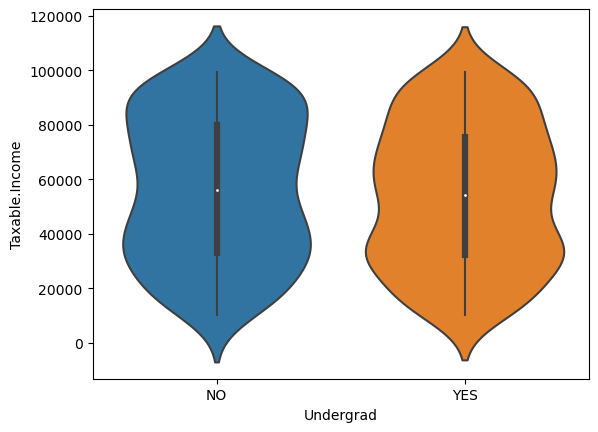

In [16]:
print(df['Undergrad'].value_counts())
sns.violinplot(x='Undergrad', y='Taxable.Income', data =df)

In [ ]:
sns.distplot()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: Taxable.Income, dtype: float64


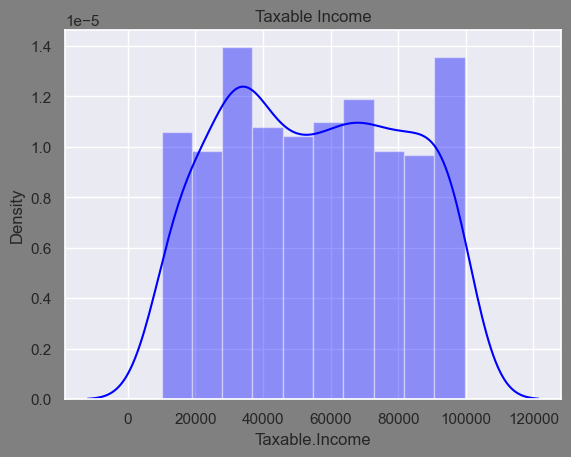

In [61]:
# Taxble Income representation with distribution chart
print(df['Taxable.Income'].describe())
sns.set(rc={'figure.facecolor':'grey'})
sns.distplot()
sns.distplot(df['Taxable.Income'],color='blue',bins=10)
plt.title('Taxable Income')
plt.show()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64


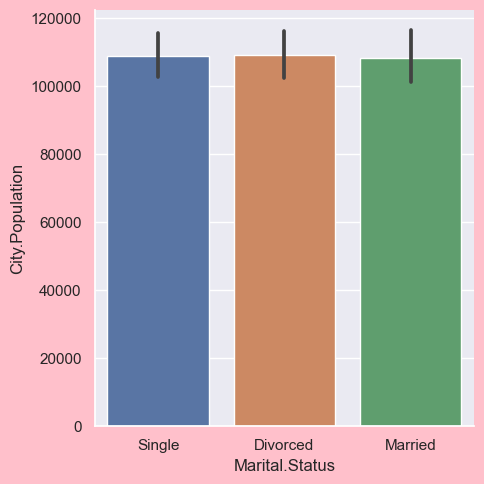

In [74]:
# Factor plot representation of Marital Status and City populaiton
print(df['Marital.Status'].value_counts())
sns.set(rc={'figure.facecolor':'pink'})
sns.factorplot(x='Marital.Status',y='City.Population',data=df,kind='bar')
plt.show()

## Creating the Target Variable based on Taxable Income 
## Good if Taxable_Income >30000 & Risky if Taxable_Income<=30000

In [82]:
fraud=[]
for row in df['Taxable.Income']:
    if row<=30000: fraud.append('Risky')
    elif row>30000: fraud.append('Good')

In [84]:
fraud

['Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Go

In [85]:
df['fraud']=fraud

In [86]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,fraud
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [105]:
# Converting Categorical variables into numerical by using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
cols=['Undergrad','Marital.Status','Urban','fraud']
df[cols]=df[cols].apply(LabelEncoder().fit_transform)
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,fraud
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [118]:
#Defining Independent and Dependent Variables
array=df.values
x=array[:,0:-1]
y=array[:,-1]

In [107]:
array

array([[    0,     2, 68833, ...,    10,     1,     0],
       [    1,     0, 33700, ...,    18,     1,     0],
       [    0,     1, 36925, ...,    30,     1,     0],
       ...,
       [    0,     0, 47334, ...,     0,     1,     0],
       [    1,     1, 98592, ...,    17,     0,     0],
       [    0,     0, 96519, ...,    16,     0,     0]], dtype=int64)

## Building the RandomForestClassifier Model

In [216]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.20)

kfold=KFold(n_splits=10, random_state=None)
max_features=3
num_trees=100
model=RandomForestClassifier(n_estimators=num_trees,max_features=max_features)
model.fit(x_train,y_train)

RandomForestClassifier(max_features=3)

In [217]:
pred=model.predict(x_test)
pred

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [218]:
np.mean(pred==y_test)

1.0

In [215]:
results=cross_val_score(model,x_train,y_train,cv=kfold)
print(results.mean())

0.9979166666666666


## Conclusion: 
**I have got the accuracy for the model as 99%, we already aware that the data is not so comlex becuase we have created the target variable with just by taking only one parameter that is Taxable Income so the target variable or the outcome is mostly biased on one feature thats the reason we getting high accuracy**